## Heavy Residue in Building 77 ##

The data about Heavy Residue (henceforth HR) contains information about the weight of each material class found in each unit(context). For the purpose of this analysis, all three fractions (4mm, 2mm and 1mm) were combined. The weights were standardized, and the values represent total weight of each material, dividied by the number of litres of soil. The data was exported from the Heavy Residue Database. 


**Importing necessary libraries**

In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### 1 Inspecting Data

In [419]:
#importing data
df = pd.read_csv('Building77.csv')

In [420]:
#Checking the number of records. The dataframe contains 308 records and 31 columns.
df.shape

(308, 31)

In [421]:
#Checking the information stored in each column
df.columns

Index(['UNIT', 'Sample', 'Flot Number', 'GID', 'Sum of Flot Volume',
       'Clay Ball', 'Figurine', 'Clay Object', 'Shaped Clay', 'Pottery',
       'Stone', 'Worked Bone', 'Worked Stone', 'Beads ', 'Plant ', 'Bone ',
       'Mollusc ', 'Eggshell ', 'Obsidian ', 'Flint', 'Mound', 'Area',
       'Building', 'Space', 'Feature', 'DataCategory', 'Location',
       'Description', 'context', 'context subtype', 'Occ Phase'],
      dtype='object')

In [422]:
# Renaming columns (some columns have blank spaces after the name[e.g. Obsidian])
df = df.rename(columns=lambda x: x.rstrip())

df.columns

Index(['UNIT', 'Sample', 'Flot Number', 'GID', 'Sum of Flot Volume',
       'Clay Ball', 'Figurine', 'Clay Object', 'Shaped Clay', 'Pottery',
       'Stone', 'Worked Bone', 'Worked Stone', 'Beads', 'Plant', 'Bone',
       'Mollusc', 'Eggshell', 'Obsidian', 'Flint', 'Mound', 'Area', 'Building',
       'Space', 'Feature', 'DataCategory', 'Location', 'Description',
       'context', 'context subtype', 'Occ Phase'],
      dtype='object')

In [423]:
#showing the first five rows 
df.head()

,UNIT,Sample,Flot Number,GID,Sum of Flot Volume,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,context subtype,Occ Phase
0,22092,2,11429,22092.2.11429,5.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",NaN,activity,NaN,fire spots (non-structured),activity,activity,B77.1.A
1,19008,2,9196,19008.2.9196,20.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",6052,",burial fill,cut,burial,burial fill,burial fill,B77.6
2,19021,2,9222,19021.2.9222,28.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3601,",burial fill,cut,burial,burial fill,burial fill,B77.6
3,19044,2,9229,19044.2.9229,32.0,NaN,NaN,NaN,NaN,0.226875,...,North,77,",336,",",3600,",burial fill,cut,burial,burial fill,burial fill,B77.6
4,19295,2,9520,19295.2.9520,36.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3615,",burial fill,cut,burial,burial fill,burial fill,B77.7


At the first glance, we can see  there are  missing values.

In [424]:
#Finding the number of missing values in each column
df.isna().sum()

UNIT                    0
Sample                  0
Flot Number             0
GID                     0
Sum of Flot Volume      0
Clay Ball             294
Figurine              304
Clay Object           292
Shaped Clay           294
Pottery               297
Stone                 278
Worked Bone           302
Worked Stone          302
Beads                 271
Plant                  42
Bone                    5
Mollusc                37
Eggshell              153
Obsidian               57
Flint                 289
Mound                   0
Area                    0
Building                0
Space                   0
Feature                89
DataCategory            0
Location                2
Description           111
context                 0
context subtype         0
Occ Phase               9
dtype: int64

It appears that the missing values (NaN) are the result of some samples not having some material types. For example, Unit 22092 did not have any clay balls, figurines, clay objects, shaped clay or pottery. Information about Feature, Description, LOcation and Occupation Phase is also missing for a number of records, which is fine. For example, not all units belong to a feature, and Location and Description for some Data Categories is never entered (e.g. ). Occupation phase though should exist for each unit. Therefore, these rows will be dropped when considering distribution of material in each occupation phase. 

In [425]:
#checking the type of information stored in each column. 
df.dtypes

UNIT                    int64
Sample                  int64
Flot Number             int64
GID                    object
Sum of Flot Volume    float64
Clay Ball             float64
Figurine              float64
Clay Object           float64
Shaped Clay           float64
Pottery               float64
Stone                 float64
Worked Bone           float64
Worked Stone          float64
Beads                 float64
Plant                 float64
Bone                  float64
Mollusc               float64
Eggshell              float64
Obsidian              float64
Flint                 float64
Mound                  object
Area                   object
Building                int64
Space                  object
Feature                object
DataCategory           object
Location               object
Description            object
context                object
context subtype        object
Occ Phase              object
dtype: object

It appears that the pandas read the file correctly. All numeric values are stored as floats or integeres, whereas other fields represent strings (text).

In [426]:
#Describing values in the table
df.describe()

,UNIT,Sample,Flot Number,Sum of Flot Volume,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,Stone,Worked Bone,Worked Stone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint,Building
count,308.000000,308.000000,308.000000,308.000000,14.000000,4.000000,16.000000,14.000000,11.000000,30.000000,6.000000,6.0,37.000000,266.000000,303.000000,271.000000,155.000000,251.000000,19.000000,308.0
mean,20197.188312,2.025974,9792.642857,17.299675,0.642061,0.053633,0.206102,0.460309,0.122193,0.495469,0.293339,0.0,0.021650,0.339928,1.035441,0.041482,0.010186,0.065659,0.023413,77.0
std,3402.298414,0.455842,1111.818188,19.401279,0.645235,0.038576,0.228708,0.775415,0.103651,1.396431,0.609772,0.0,0.033203,3.212798,1.846743,0.046206,0.021732,0.453180,0.020665,0.0
min,16400.000000,1.000000,7897.000000,0.100000,0.016176,0.015938,0.001538,0.002404,0.003974,0.024324,0.011000,0.0,0.000488,0.000455,0.001667,0.001111,0.000286,0.000690,0.002500,77.0
25%,19006.750000,2.000000,9196.750000,6.000000,0.160268,0.036395,0.031284,0.043393,0.037925,0.088333,0.019966,0.0,0.002273,0.006278,0.174000,0.010000,0.002000,0.010000,0.007636,77.0
50%,19424.000000,2.000000,9453.500000,13.500000,0.361349,0.045547,0.064688,0.093219,0.085000,0.191129,0.053199,0.0,0.006000,0.017639,0.485000,0.025517,0.004643,0.022857,0.019167,77.0
75%,21628.750000,2.000000,10945.250000,24.000000,0.994444,0.062784,0.355721,0.343333,0.206750,0.338815,0.086339,0.0,0.030000,0.054018,1.121116,0.055930,0.009167,0.043864,0.026628,77.0
max,30597.000000,5.000000,11993.000000,156.000000,2.293333,0.107500,0.631250,2.385909,0.303333,7.809091,1.536364,0.0,0.157241,50.714286,15.493125,0.336562,0.165714,7.162000,0.072353,77.0


The summary above gives the basic information about each column, such as, minimum,maximum, median, mean and standard deviation for each column. It shows that the standard deviation is quite high for some values, meaning that the samples are not normally distributed. 

### 2 Basic information about samples

In [427]:
# Checking number of samples from each context type
df['DataCategory'].value_counts()


construction/make-up/packing    104
fill                             90
floors (use)                     77
burial fill                      33
cluster                           3
activity                          1
Name: DataCategory, dtype: int64

Data Category represents the type of context. We can see that construction/make-up/packing (henceforth construction), fill, floors and burial fills are the categories worth exploring. Clusters should never have flotation samples (as they represent group of objects, and as such, they should not have any soil); therefore, this is a mistake. Also, as there is only one sample from the activity deposit, this will be removed as well.  

In [428]:
# removing cluster samples
df = df[df.DataCategory != 'cluster']
df = df[df.DataCategory != 'activity']

In [429]:
# renaming construction/make-up/packing 

df = df.replace('construction/make-up/packing','construction')


In [430]:
#Finding the total number of litres taken from each context type
df.groupby('DataCategory')['Sum of Flot Volume'].sum()

DataCategory
burial fill     1016.9
construction    1239.4
fill            1995.5
floors (use)    1006.0
Name: Sum of Flot Volume, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

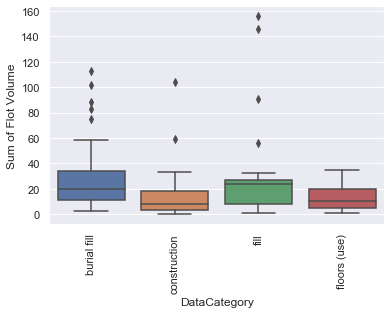

In [431]:
# visualising the volumes of each data category
sns.boxplot( x=df["DataCategory"], y=df['Sum of Flot Volume'] );
plt.xticks(rotation=90)


We see that the burial fills and fills have higher median volumes than the other two deposit types, and there are a number of samples with a much higher volume. 

### 3. How often are materials present in samples? 

In [432]:
#retrieving columns with material
cols= df.iloc[:, 5:20]
cols.columns
# Count of samples in which each material is present
ubiquity = df[cols.columns].count().sort_values(ascending=False)
ubiquity

Bone            299
Mollusc         267
Plant           262
Obsidian        248
Eggshell        153
Beads            37
Stone            30
Flint            19
Clay Object      15
Clay Ball        14
Shaped Clay      13
Pottery          11
Worked Stone      6
Worked Bone       6
Figurine          4
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

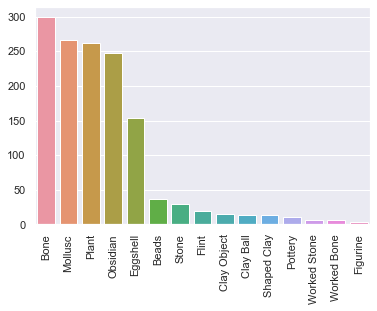

In [433]:
sns.barplot(x=ubiquity.index, y=ubiquity)
plt.xticks(rotation=90)


As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell and obsidian. Other materials are less frequent and occur in less than 50 samples.

In [434]:
# counting number of times a material class exists in a context type
presence = df.groupby(['DataCategory'])[cols.columns].count()

# adding a column wiht total number of samples from each context
presence['samples'] = df.groupby(['DataCategory'])['DataCategory'].count()

#calculating percentages
for i in cols:
        presence[i]=round(presence[i]/presence['samples']*100,2)
#dropping the column with number of samples
presence = presence.drop(columns='samples')

#Showing results
presence


,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,Stone,Worked Bone,Worked Stone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint
DataCategory,,,,,,,,,,,,,,,
burial fill,12.12,3.03,6.06,3.03,9.09,42.42,6.06,6.06,57.58,96.97,100.00,96.97,78.79,100.00,12.12
construction,3.85,0.00,4.81,3.85,0.00,7.69,1.92,1.92,2.88,75.96,96.15,83.65,40.38,71.15,7.69
fill,3.33,2.22,5.56,8.89,7.78,4.44,2.22,2.22,10.00,92.22,98.89,90.00,56.67,90.00,2.22
floors (use),3.90,1.30,3.90,0.00,1.30,5.19,0.00,0.00,7.79,88.31,100.00,87.01,44.16,77.92,6.49


As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell and obsidian. Other materials are less frequent, though it should be noted that the majority of types occur more commonly  in burial fills than in other types of deposits. 

### 4. What is the density of materials in different context types?

In [435]:
df.head()

,UNIT,Sample,Flot Number,GID,Sum of Flot Volume,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,context subtype,Occ Phase
1,19008,2,9196,19008.2.9196,20.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",6052,",burial fill,cut,burial,burial fill,burial fill,B77.6
2,19021,2,9222,19021.2.9222,28.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3601,",burial fill,cut,burial,burial fill,burial fill,B77.6
3,19044,2,9229,19044.2.9229,32.0,NaN,NaN,NaN,NaN,0.226875,...,North,77,",336,",",3600,",burial fill,cut,burial,burial fill,burial fill,B77.6
4,19295,2,9520,19295.2.9520,36.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3615,",burial fill,cut,burial,burial fill,burial fill,B77.7
5,19471,5,9762,19471.5.9762,5.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3642,",burial fill,cut,burial,burial fill,burial fill,B77.5


In [436]:
# Replacing missing valuse with 0
df2 = df.copy()
df2 =df2.fillna(0)


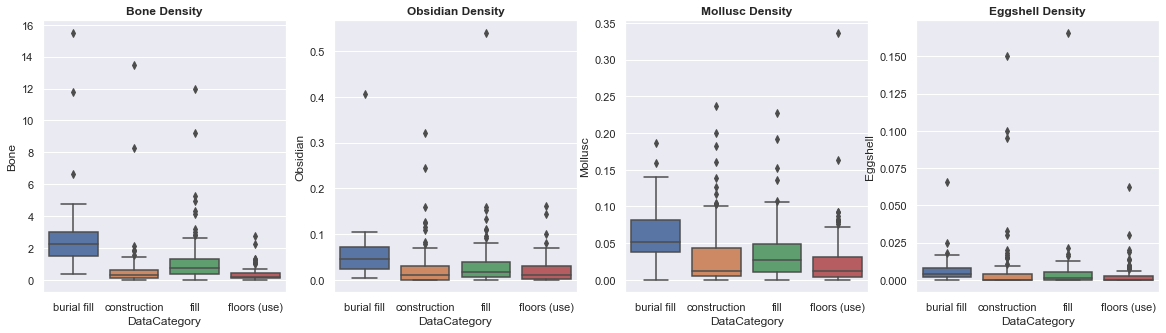

In [440]:
fix, ax = plt.subplots(nrows=1, ncols=4, figsize= (20,5))

sns.boxplot(df2["DataCategory"], df2['Bone'],
             ax=ax[0]);
ax[0].set_title("Bone Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Obsidian'],
             ax=ax[1]);
ax[1].set_title("Obsidian Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Mollusc'],
             ax=ax[2]);
ax[2].set_title("Mollusc Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Eggshell'],
             ax=ax[3]);
ax[3].set_title("Eggshell Density", fontweight='bold');


As the values are normally distributed, there are a lot of outliers. 
Nevertheless, it is clear that all frequent materials have a higher density in burial fills than they do in other types of deposits. This points to the need for further examination of materials in burial fills, and their common interpretation in archaeology as accidental inclusions (rather than deliberate placement). 

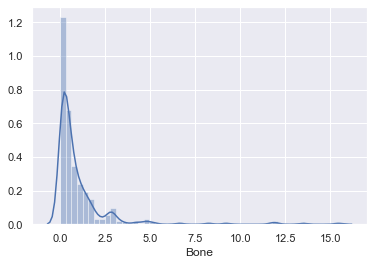

In [438]:
sns.distplot(df['Bone'])

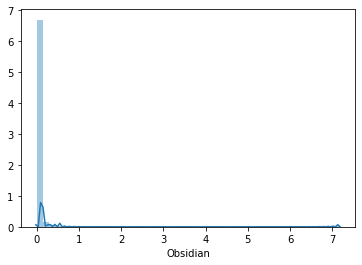

In [112]:
sns.distplot(df['Obsidian']);

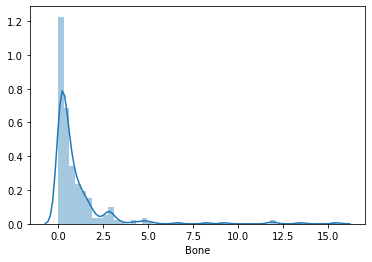

In [113]:
sns.distplot(df['Bone']);


In [114]:
df['Obsidian_Log10'] = round(np.log10(df['Obsidian']),2)
df.head(20)

,UNIT,Sample,Flot Number,GID,Sum of Flot Volume,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,...,Building,Space,Feature,DataCategory,Location,Description,context,context subtype,Occ Phase,Obsidian_Log10
0,22092,2,11429,22092.2.11429,5.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",NaN,activity,NaN,fire spots (non-structured),activity,activity,B77.1.A,0.86
1,19008,2,9196,19008.2.9196,20.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",6052,",burial fill,cut,burial,burial fill,burial fill,B77.6,-1.24
2,19021,2,9222,19021.2.9222,28.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3601,",burial fill,cut,burial,burial fill,burial fill,B77.6,-1.53
3,19044,2,9229,19044.2.9229,32.0,NaN,NaN,NaN,NaN,0.226875,...,77,",336,",",3600,",burial fill,cut,burial,burial fill,burial fill,B77.6,-1.21
4,19295,2,9520,19295.2.9520,36.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3615,",burial fill,cut,burial,burial fill,burial fill,B77.7,-1.67
5,19471,5,9762,19471.5.9762,5.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3642,",burial fill,cut,burial,burial fill,burial fill,B77.5,-2.40
6,19512,2,9446,19512.2.9446,8.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3615,",burial fill,cut,burial,burial fill,burial fill,B77.7,-1.05
7,19525,2,9665,19525.2.9665,10.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3615,",burial fill,cut,burial,burial fill,burial fill,B77.7,-1.05
8,19526,2,9666,19526.2.9666,88.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3616,",burial fill,cut,burial,burial fill,burial fill,B77.2.D,-1.14
9,19533,2,9617,19533.2.9617,2.0,NaN,NaN,NaN,NaN,NaN,...,77,",336,",",3616,",burial fill,cut,burial,burial fill,burial fill,B77.2.D,-2.30


In [116]:
len(df)


305

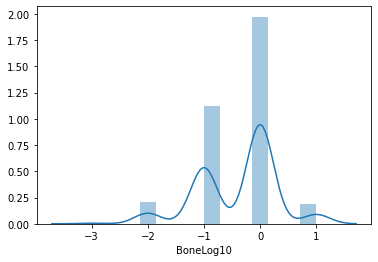

In [117]:
sns.distplot(df['BoneLog10']);


In [118]:
Bone_m= df.groupby(df['DataCategory'])['Bone'].median().reset_index()

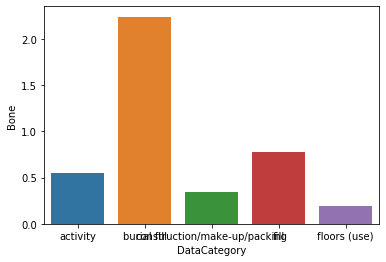

In [119]:
sns.barplot(y= Bone_m['Bone'],x=Bone_m['DataCategory'])

In [120]:
fills = df.loc[df['DataCategory'] == 'fill']
fills

,UNIT,Sample,Flot Number,GID,Sum of Flot Volume,Clay Ball,Figurine,Clay Object,Shaped Clay,Pottery,...,Description,context,context subtype,Occ Phase,Obsidian_Log10,PlantLog10,BoneLog10,MolluscLog10,EggshellLog10,ObsidianLog10
139,19029,2,9220,19029.2.9220,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill between walls,B77,-2.12,-1.0,1.0,-1.0,-2.0,-2.0
140,19032,2,9223,19032.2.9223,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill between walls,B77,-1.29,-2.0,-0.0,-2.0,-2.0,-1.0
141,20618,2,10354,20618.2.10354,6.5,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill between walls,NaN,-2.51,-1.0,-0.0,-2.0,NaN,-3.0
142,21614,2,11541,21614.2.11541,27.5,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill between walls,NaN,-0.80,-2.0,0.0,-1.0,-3.0,-1.0
143,22048,2,11308,22048.2.11308,29.0,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill between walls,NaN,-1.23,-3.0,1.0,-2.0,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,17526,2,8704,17526.2.8704,1.0,NaN,NaN,NaN,NaN,NaN,...,niche,fill,fill niche,B77.9,-2.00,-2.0,-0.0,-2.0,NaN,-2.0
225,19084,2,9305,19084.2.9305,6.0,NaN,NaN,NaN,NaN,NaN,...,oven,fill,fill oven,B77.6,-1.88,-1.0,-1.0,-2.0,NaN,-2.0
226,19551,2,9629,19551.2.9629,8.0,NaN,NaN,NaN,NaN,NaN,...,oven,fill,fill oven,B77.6,-2.43,-1.0,-1.0,NaN,NaN,-2.0
227,17529,2,8732,17529.2.8732,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,fill,fill,B77.9,-1.39,-1.0,0.0,-2.0,-3.0,-1.0


In [121]:
df['context subtype'].str.startswith('fill')

0      False
1      False
2      False
3      False
4      False
       ...  
303    False
304    False
305    False
306    False
307     True
Name: context subtype, Length: 305, dtype: bool

In [122]:
df = df.replace('burial fill','fill burial')


In [123]:
fillz = df.where(df['context subtype'].str.startswith('fill'))
fillz = fillz.dropna()
fillzBone = fillz.groupby(['context subtype','Bone'])['Bone'].mean()
a = sns.barplot(y= fillzBone['Bone'].mean() ,x=fillzBone['context subtype'])
plt.xticks(rotation=90)
a.set(ylim=(0, 100))

KeyError: 'Bone'

In [50]:
post = df.loc[df['context subtype'] == 'fill posthole/stakehole']

post['Bone']

202    9.240000
203    0.035000
204    0.736250
205    0.325000
206    1.125333
207    0.150000
Name: Bone, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

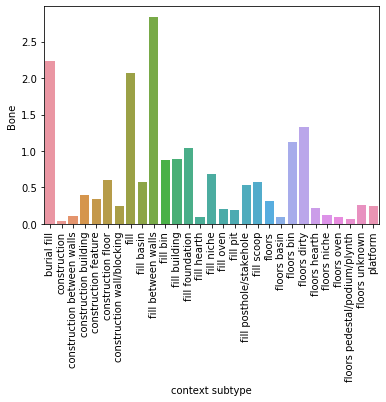

In [369]:
Bone_c= df.groupby(df['context subtype'])['Bone'].median().reset_index()

sns.barplot(y= Bone_c['Bone'],x=Bone_c['context subtype'])
plt.xticks(rotation=90)

In [124]:
Bone_c

,context subtype,Bone
0,activity,0.546000
1,construction,0.040000
2,construction between walls,0.103333
3,construction building,0.394783
4,construction feature,0.342308
5,construction floor,0.602952
6,construction wall/blocking,0.240000
7,fill,2.067857
8,fill basin,0.570000
9,fill between walls,2.839273
